In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
player_data= pd.read_csv('data.csv', index_col= 'Unnamed: 0', parse_dates = ['Joined', 'Contract Valid Until'])
player_data['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

AT what Age will it be profitable to buy a player

In [167]:

player_data
player_data.groupby('Club').count()
player_data['Wage'] = player_data['Wage'].apply(lambda x: int(re.findall('\d+', x)[0] + '000'))
player_data['Realease Clause']=player_data['Value'].apply(lambda x: 'M' in x and int((re.findall('\d+\.*\d*', x)[0] + '000000').replace('.','')) or int((re.findall('\d+\.*\d*', x)[0] + '000').replace('.', '')))
player_data['Value'] = player_data['Value'].apply(lambda x: 'M' in x and int((re.findall('\d+\.*\d*', x)[0] + '000000').replace('.','')) or int((re.findall('\d+\.*\d*', x)[0] + '000').replace('.', '')))
data= player_data[['Age', 'Value']].set_index('Age')
data
#player_data['Nationality'].value_counts().head(20)

,Value
Age,
31,1105000000
33,77000000
26,1185000000
27,72000000
27,102000000
...,...
19,60000
19,60000
16,60000


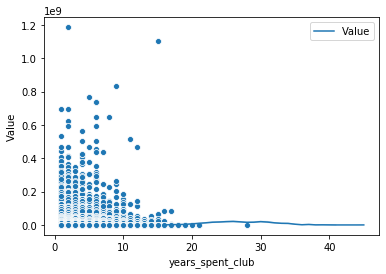

In [168]:
sns.lineplot(data = data)
data2 = player_data.loc[:, ['Age', 'Joined', 'Value', 'Realease Clause', 'Potential', 'Contract Valid Until']]
data2['Year']= data2['Joined'].dt.year
data2['End of Contract']= data2['Contract Valid Until'].dt.year
data2['years_spent_club'] = 2019 - data2['Year']
data2['duration of purchase']= data2['End of Contract'] - data2['Year']
data2
sns.scatterplot(x= data2['years_spent_club'], y= data2['Value'])

The above graph shows the value of players is not dependent on the number of years spent. The scattered diagram shows there is not relationship between the two variables

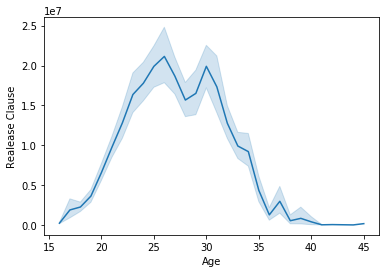

In [169]:
sns.lineplot(x = 'Age', y= 'Realease Clause', data= data2)

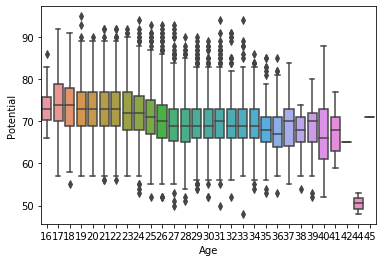

In [170]:


data4= data2.groupby('Age')['Potential'].mean()
#p =sns.lineplot(x= 'Age', y= 'Value', data = data2, label = 'Age')
data4
sns.boxplot(x = 'Age', y='Potential', data= data2)


The boxplot shows that the best age to buy a player is at 17 or within the range of 17 to 21. Durig this time players have the highest potential. From age 26 the potetial of players begin to dwindle. More so, from 22 to 32 the release clause increases and reaches its peak at age 26. as seen in the lineplot

In [171]:
data2['Age Joined']= data2['Age']- data2['years_spent_club']

<Figure size 2160x720 with 0 Axes>

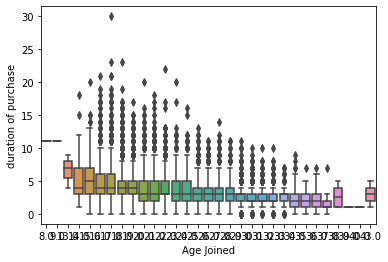

<Figure size 2160x720 with 0 Axes>

In [172]:
sns.boxplot(x = 'Age Joined', y='duration of purchase', data= data2)
plt.figure(figsize= (30,10))

The above plot reemphasises the intelligence in buying players within the age range of 17 to 21. The players bought at age 17 to 19 years tend to sign contracts to spend more years in the team than ages after this age range. The data doesn't indicate renewals of contract. So there is two sides to it. The club will profit from the players cause after the contracts with the young players(17years), the players have already reached the peak of their career and their release clauses increase. At this time if they are sold, the team profits. On the other hand, they will be sold just when they become very valuable to the team. Another way to llok at it is that, by the time they grow in the club and reach their peaks, most clubs will not be able to afford their release clauses.

In [173]:
player_data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

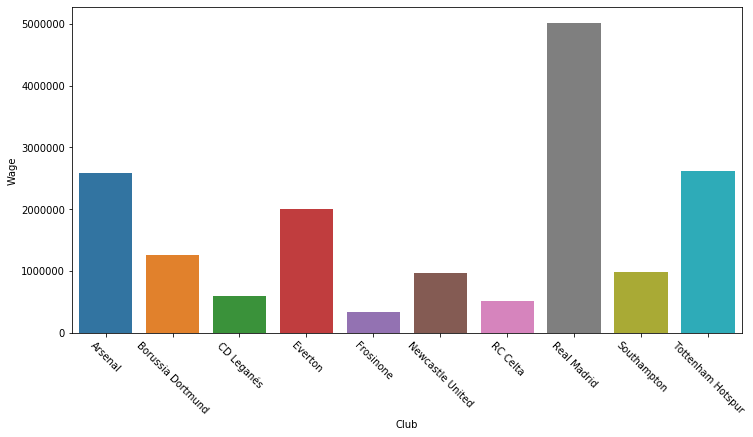

In [174]:
top_ten_clubs= player_data['Club'].value_counts().head(10).index.values
top_ten_data= player_data[player_data['Club'].isin(top_ten_clubs)]
the_data= top_ten_data.groupby('Club')['Wage'].sum()
the_data
plt.figure(figsize=(12,6))
sns.barplot(x= the_data.index, y=the_data)
plt.xticks(rotation=-45)

From the histogram above, it is evident that among the first 10 most popular clubs, Barcelona spends the most on paying player wages.We want to find out why.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

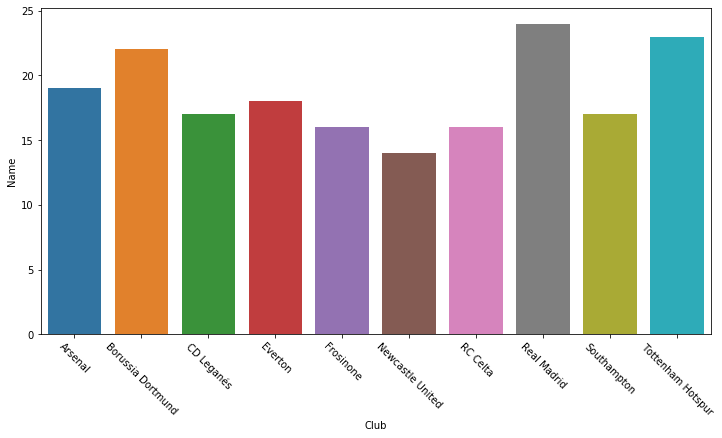

In [175]:
#we want to see why some teams spend more on Wages than others
#A good place to start is in the percentage of valuable players in each team
#we use the 75 perentile to wrangle the data
player_data.describe()
higher_quartile= top_ten_data[top_ten_data['Value']>= 13000000]
higher_data=higher_quartile.groupby('Club')['Name'].count()
plt.figure(figsize=(12,6))
sns.barplot(x= higher_data.index, y=higher_data)
plt.xticks(rotation = -45)

comparing the two Barplots, we can see that Barcelona has the highest number of valuable players as well as the highest amount of Wages paid. However, taking a closer look at the barplots, the tottenham has quite a high number of valuable players but pay little wage. Why is that?

In [176]:
print(higher_data)
top_data= top_ten_data.groupby('Club').size()

Club
Arsenal              19
Borussia Dortmund    22
CD Leganés           17
Everton              18
Frosinone            16
Newcastle United     14
RC Celta             16
Real Madrid          24
Southampton          17
Tottenham Hotspur    23
Name: Name, dtype: int64


In [177]:
new_data = pd.concat([top_data, higher_data], axis =1)
new_data['total']= new_data[0]
new_data['higher value']= new_data['Name']
new_data.drop(['Name', 0], axis = 1, inplace = True)
new_data['percentage']= new_data['higher value']/new_data['total']*100
new_data

,total,higher value,percentage
Club,,,
Arsenal,33,19,57.575758
Borussia Dortmund,33,22,66.666667
CD Leganés,33,17,51.515152
Everton,33,18,54.545455
Frosinone,33,16,48.484848
Newcastle United,33,14,42.424242
RC Celta,33,16,48.484848
Real Madrid,33,24,72.727273
Southampton,33,17,51.515152


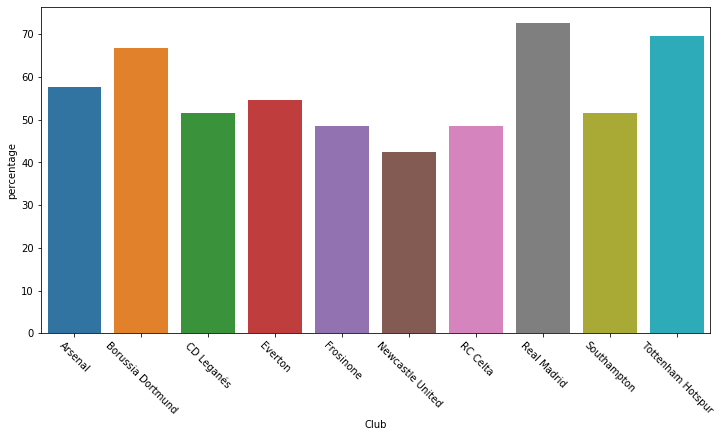

In [178]:
p= plt.figure(figsize=(12,6))
p= sns.barplot(x=new_data.index, y=new_data['percentage'], label = 'percentage')
p= plt.xticks(rotation = -45)
plt.show()

There is no difference between the percentage of valuable players and the number of valuable players plot for each club. The reason is that all clubs have the same total number of players registered in the data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Realease Clause
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,77000000
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,72000000
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,93000000
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,67000000
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,80000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,60000
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,60000
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,60000
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,60000


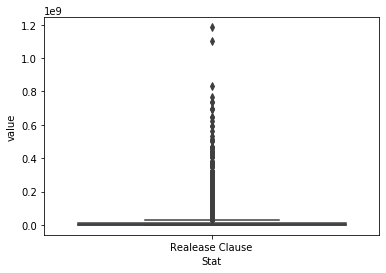

In [265]:
#removing outliers
#in oder to apply machine learning algorithm to predict the Valu of the players
data = player_data[['Realease Clause', 'ID']]
data
melted = pd.melt(data, 
                 id_vars = ['ID'],
                 var_name= 'Stat')
melted
sns.boxplot(x='Stat', y= 'value', data=melted)
upperlim = player_data['Value'].mean() + 2*player_data['Value'].std()
lowerlim = player_data['Value'].mean() - 2*player_data['Value'].std()
player_data[((player_data['Value']>lowerlim) & (player_data['Value'] < upperlim))]

['Loaned From', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']


,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,1105000000,565000,2202,5.0,4.0,4.0,10.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,77000000,405000,2228,5.0,4.0,5.0,7.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,1185000000,290000,2143,5.0,5.0,5.0,10.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,91,92,102000000,355000,2281,4.0,5.0,4.0,7.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,91,91,93000000,340000,2142,4.0,4.0,4.0,10.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,60000,1000,1307,1.0,2.0,2.0,22.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,19,47,63,60000,1000,1098,1.0,2.0,2.0,21.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,16,47,67,60000,1000,1189,1.0,3.0,2.0,33.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,17,47,66,60000,1000,1228,1.0,3.0,2.0,34.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


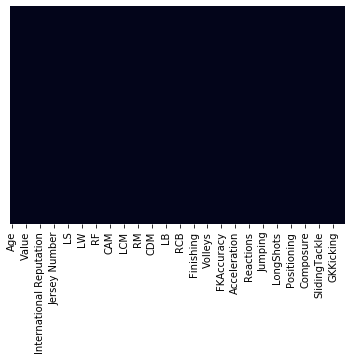

In [267]:
numerical_cols= [col for col in player_data.columns if player_data[col].dtype in ['float', 'int']]
categorical_cols = [col for col in player_data.columns if player_data[col].dtype == 'object']

#some categorical variables will have a lot of unique values which will affect the preprocessing
#we remove ones with excess unique categories here
the_counts= list(zip(player_data[categorical_cols].nunique().index, player_data[categorical_cols].nunique()))
cols_to_del= [i for i, v in the_counts if float(v)/player_data.shape[0]*100<0.2]

the_counts
player_data1= player_data.drop(cols_to_del, axis=1)

#removing categorical columns that are obviously not needed as a feature in the modl
player_data2= player_data1.drop([ 'ID', 'Nationality','Realease Clause', 'Name', 'Photo', 'Club', 'Club Logo', 'Flag', 'Release Clause'], axis = 1)
player_data2.isnull().any()
categorical_cols = [col for col in player_data2.columns if player_data[col].dtype == 'object']
print(categorical_cols)
#using heatmap to check for NaN in the data
sns.heatmap(player_data2.isnull(), yticklabels = False, cbar = False)


#from the heatmap, the columns 'Joined' and 'Loaned From' have almost all 
#its values missing. So we drop the entire column
player_data3 = player_data2.drop(['Joined', 'Loaned From'], axis = 1)
sns.heatmap(player_data3.isnull(), yticklabels = False, cbar = False)
new_player_data = player_data3.dropna()
sns.heatmap(new_player_data.isnull(), yticklabels = False, cbar = False)

new_player_data

In [268]:
numerical_cols= [col for col in new_player_data.columns if player_data[col].dtype in ['float64', 'int64']]
print(numerical_cols)

['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [271]:
#The heatmap shows that there are not any missing values in the dataset anymore we are good to go for  preprocessing
new_player_data1 = new_player_data.drop(['International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number'], axis = 1)
numerical_cols= [col for col in new_player_data1.columns if player_data[col].dtype in ['float64', 'int64']]
categorical_cols = [col for col in new_player_data1.columns if player_data[col].dtype == 'object']
numerical_cols.remove('Value')

new_player_data2 = new_player_data1.drop('Contract Valid Until', axis = 1)

print(categorical_cols)

# get our features and label for machine learning
y=new_player_data2['Value']
X=new_player_data2.drop('Value', axis = 1)

#prepare the notebook for machine learning. import from sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn .preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown= 'ignore')
Numerical_transformer = Pipeline(steps=[('scalar', scaler )])
categorical_transformer = Pipeline(steps=[('cat', onehot)])
preprocessing = ColumnTransformer(transformers=[('num', Numerical_transformer, numerical_cols),
                                                ('cat', categorical_transformer, categorical_cols)])
X_train, X_valid, y_train, y_valid= train_test_split(X,
                                                     y, 
                                                     test_size=0.25, 
                                                     random_state=0)
#encode = LabelEncoder()
#label_X_train = X_train.copy()
#label_X_valid= X_valid.copy()
#for col in categorical_cols:
    #label_X_train[col]= encode.fit_transform(X_train[col])
    #label_X_valid[col]= encode.transform(X_valid[col])


model = RandomForestRegressor(n_estimators = 100,
                              max_depth = 15,
                              min_samples_split=5,
                              min_samples_leaf= 1,
                              random_state=0)
rfmodel = Pipeline(steps= [('preprocessing', preprocessing), ('model', model)])
#plmodel= Pipeline(steps=[('polyFeature', polynomial_features), ('regressor', model)])
rfmodel.fit(X_train, y_train)
pred= rfmodel.predict(X_valid)
df= pd.DataFrame({'Actual': y_valid, 'Predicted': pred})
df


['Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']


,Actual,Predicted
12162,425000,4.387993e+05
15286,250000,2.386668e+05
4416,3000000,2.691449e+07
13934,400000,3.955547e+05
15985,160000,1.658531e+05
...,...,...
13512,400000,3.954006e+05
7022,11000000,1.100000e+07
13125,170000,1.841465e+05
11457,1000000,9.370794e+05


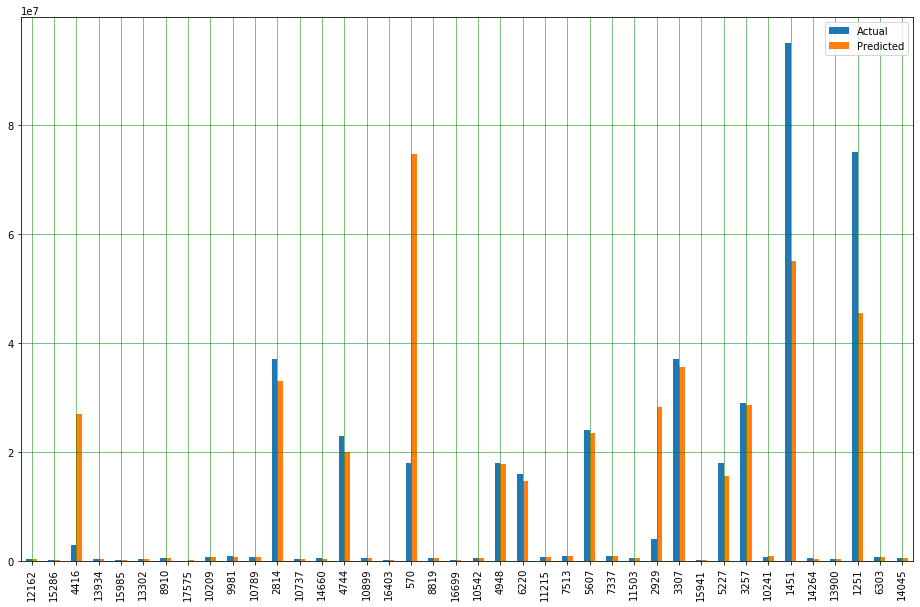

In [272]:
df1 = df.head(40)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.show()

The accuracy of the model is very low. This is because there are some bias leading to outliers in the release clause and value or the data isnt enough. i believe data like 'no of cups won', 'club league', 'Ballon de Or Nominations' Etc. 

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Realease Clause
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,77000000
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,72000000
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,93000000
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,67000000
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,80000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,60000
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,60000
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,60000
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,60000


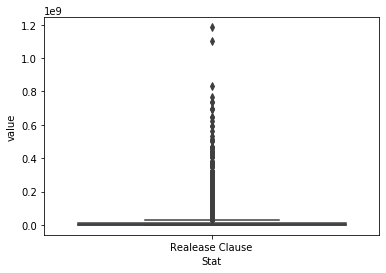